In [ ]:
# Rodar apenas 1 vez, baixa a base de dados

# Para S.O Linux
# !wget https://download.pytorch.org/tutorial/data.zip
# !unzip data.zip

# Para S.O windows
# import urllib.request
# import zipfile
# import os

# url = "https://download.pytorch.org/tutorial/data.zip"
# zip_path = "data.zip"

# urllib.request.urlretrieve(url, zip_path)

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(".")

# os.remove(zip_path)


In [1]:
import os
import numpy as np
import unicodedata

def le_arquivo(path):
    with open(path, encoding='utf-8') as f:
        nomes = f.read().strip().split('\n')

    nomes = [unicodedata.normalize('NFKD', nome).encode('ascii', 'ignore') for nome in nomes]

    categoria = path.split('/')[-1].split('.')[0]
    categorias = np.repeat(categoria, len(nomes))
    
    return nomes, categorias
root = './data/names/'
arquivos = sorted(os.listdir(root))

dados, rotulos = [], []
for arquivo in arquivos:
    nomes, nacionalidades = le_arquivo(os.path.join(root, arquivo))
    
    dados.append(nomes)
    rotulos.append(nacionalidades)
    
len(dados), len(rotulos)



(18, 18)

In [2]:
import torch

categorias = [arquivo.split('.')[0] for arquivo in arquivos]

def label2tensor(str):
    posicao = categorias.index(str)
    return torch.LongTensor([posicao])

rotulos[8][10], label2tensor(rotulos[8][10])



(np.str_('Irish'), tensor([8]))

In [3]:
import string

dicionario = string.ascii_letters + " '-"

def name2tensor(name):
    name = name.decode('utf-8')

    name_tns = torch.zeros(len(name), len(dicionario))

    for k, letra in enumerate(name):
        if letra in dicionario:
            name_tns[k][dicionario.index(letra)] = 1

    return name_tns
print(name2tensor(dados[0][10]))

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [4]:
def amostrar(num_amostras):
    dados_amostra, rotulos_amostra = [], []
    
    for cat in categorias:
        num_nomes = len(dados[categorias.index(cat)])
        
        indices = np.random.choice(range(num_nomes), size=num_amostras)
        dados_amostra.extend([dado for idx, dado in enumerate(dados[categorias.index(cat)]) if idx in indices ])
        rotulos_amostra.extend([rotulo for idx, rotulo in enumerate(rotulos[categorias.index(cat)]) if idx in indices ])
        
    dados_amostra   = [name2tensor(nome) for nome in dados_amostra]
    rotulos_amostra   = [label2tensor(rotulo) for rotulo in rotulos_amostra]
    
    return dados_amostra, rotulos_amostra

num_amostras = 50
dados_tns, rotulos_tns = amostrar(num_amostras)

print(len(dados_tns), len(rotulos_tns))
print(dados_tns[10], rotulos_tns[10])

813 813
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [5]:
from torch import nn

class RNN(nn.Module):
    def __init__(self, tam_entrada, tam_hidden, tam_saida):
        super(RNN, self).__init__()
        self.tam_hidden = tam_hidden
        
        self.recurrent = nn.GRU(tam_entrada, tam_hidden, batch_first=False)
        self.saida     = nn.Linear(tam_hidden, tam_saida)
        self.ativacao  = nn.LogSoftmax()
        
    def forward(self, nome):
        
        h = torch.zeros(1, 1, self.tam_hidden)
        nome = nome.unsqueeze(1)
        saida, h = self.recurrent(nome)

        saida = self.ativacao(self.saida(saida[-1]))
        return saida
    
modelo = RNN(len(dicionario), 256, len(categorias))
print(modelo)

RNN(
  (recurrent): GRU(55, 256)
  (saida): Linear(in_features=256, out_features=18, bias=True)
  (ativacao): LogSoftmax(dim=None)
)


In [6]:
args = {'lr': 5e-5, 'weight_decay': 1e-7}

criterio = nn.NLLLoss()
optimizer = torch.optim.Adam(modelo.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])

def foward(X, Y, etapa, epoca):
    loss_epoca = []
    acuracia = 0.
    for dado, rotulo in zip(X, Y):
        saida = modelo(dado)
        loss = criterio(saida, rotulo)
        loss_epoca.append(loss.item())
        
        _, pred = torch.max(saida, axis= -1)
        acuracia +=1 if pred[0].item() == rotulo[0].item() else 0

        if etapa == 'treino':
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
    loss_epoca = np.array(loss_epoca)
    acuracia   = acuracia/float(len(X))
    print('\n', '*'*15 + etapa + '*'*15)
    print('Epoca: {:}, Loss: {:.2f} +- {:.2f}, Acc: {:.2f}'.format(epoca, loss.mean(), loss.std(), acuracia*100))
    
    return float(loss.mean()), float(acuracia)

In [7]:
loss_treino, loss_teste = [], []
acc_treino, acc_teste = [], []

dados_test, rotulos_teste = amostrar(50)

for epoca in range(100):
    dados_tns, rotuloss_tns = amostrar(50)
    loss, acc = foward(dados_tns, rotulos_tns, 'treino', epoca)
    loss_treino.append(loss)
    acc_treino.append(acc)
    
    loss, acc = foward(dados_test, rotulos_teste, 'teste', epoca)
    loss_teste.append(loss)
    acc_teste.append(acc)

c:\Users\07443204370\Documents\redes-recorrentes\env\Lib\site-packages\torch\nn\modules\module.py:1775: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)



 ***************treino***************
Epoca: 0, Loss: 2.98 +- nan, Acc: 3.88


C:\Users\suporte\AppData\Local\Temp\ipykernel_7824\741208807.py:25: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\ReduceOps.cpp:1857.)
  print('Epoca: {:}, Loss: {:.2f} +- {:.2f}, Acc: {:.2f}'.format(epoca, loss.mean(), loss.std(), acuracia*100))
C:\Users\suporte\AppData\Local\Temp\ipykernel_7824\741208807.py:27: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\python_variable_methods.cpp:837.)
  return float(loss.mean()), float(acuracia)



 ***************teste***************
Epoca: 0, Loss: 2.97 +- nan, Acc: 14.69

 ***************treino***************
Epoca: 1, Loss: 3.07 +- nan, Acc: 4.57

 ***************teste***************
Epoca: 1, Loss: 3.07 +- nan, Acc: 5.56

 ***************treino***************
Epoca: 2, Loss: 3.06 +- nan, Acc: 3.84

 ***************teste***************
Epoca: 2, Loss: 3.06 +- nan, Acc: 7.78

 ***************treino***************
Epoca: 3, Loss: 3.16 +- nan, Acc: 7.70

 ***************teste***************
Epoca: 3, Loss: 3.10 +- nan, Acc: 6.67

 ***************treino***************
Epoca: 4, Loss: 3.06 +- nan, Acc: 8.67

 ***************teste***************
Epoca: 4, Loss: 2.99 +- nan, Acc: 15.31

 ***************treino***************
Epoca: 5, Loss: 3.01 +- nan, Acc: 10.10

 ***************teste***************
Epoca: 5, Loss: 3.00 +- nan, Acc: 13.95

 ***************treino***************
Epoca: 6, Loss: 3.07 +- nan, Acc: 8.01

 ***************teste***************
Epoca: 6, Loss: 2.98 +- nan,

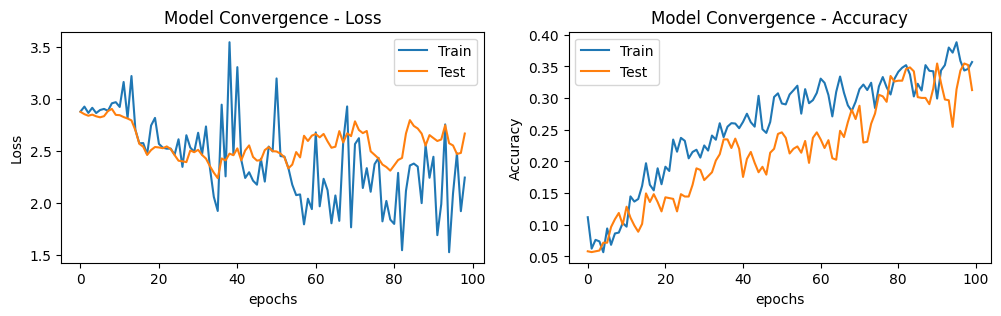

In [18]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))

ax1.plot(loss_treino[1:], label='Train')
ax1.plot(loss_teste[1:], label='Test')
ax1.set_title('Model Convergence - Loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(acc_treino, label='Train')
ax2.plot(acc_teste, label='Test')
ax2.set_title('Model Convergence - Accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()


In [24]:
def predict(nome):
    modelo.eval()
    
    tns = torch.zeros(len(nome), len(dicionario))
    for k, letra in enumerate(nome):
        idx = dicionario.find(letra)
        tns[k, idx] = 1
        
    saida = modelo(tns)
    topv, topi = saida.data.topk(3, 1, True)
    
    print(nome)
    for value, index in zip(topv[0], topi[0]):
        print('(%.2f) %s' % (value, categorias[index]))
    print('\n')
    
predict('Merkel')
predict('Hirobumi')
predict('Suarez')
    

Merkel
(-1.48) Scottish
(-1.60) Irish
(-1.75) Russian


Hirobumi
(-1.27) Japanese
(-2.45) Arabic
(-2.46) Korean


Suarez
(-1.22) Spanish
(-2.27) Portuguese
(-2.45) Italian


